In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import os

In [2]:
import loader

src_dir = './data'
benchmarks = loader.load_benchmarks_from_dir(src_dir)
df = pd.DataFrame(benchmarks)
df.head()

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,label,filename
0,BM_CCA/cca_simplified_sv/DatasetFileIndex:0/ma...,0,0,BM_CCA/cca_simplified_sv/DatasetFileIndex:0/ma...,iteration,1,0,1,33,21.277545,1503.323035,ms,tml_full/ttbar_mu20/,cuda_cca.json
1,BM_CCA/cca_simplified_sv/DatasetFileIndex:1/ma...,0,1,BM_CCA/cca_simplified_sv/DatasetFileIndex:1/ma...,iteration,1,0,1,20,34.963654,3296.441827,ms,tml_full/ttbar_mu40/,cuda_cca.json
2,BM_CCA/cca_simplified_sv/DatasetFileIndex:2/ma...,0,2,BM_CCA/cca_simplified_sv/DatasetFileIndex:2/ma...,iteration,1,0,1,16,44.425600,5749.924185,ms,tml_full/ttbar_mu60/,cuda_cca.json
3,BM_CCA/cca_simplified_sv/DatasetFileIndex:3/ma...,0,3,BM_CCA/cca_simplified_sv/DatasetFileIndex:3/ma...,iteration,1,0,1,12,60.613563,11622.533302,ms,tml_full/ttbar_mu100/,cuda_cca.json
4,BM_CCA/cca_simplified_sv/DatasetFileIndex:4/ma...,0,4,BM_CCA/cca_simplified_sv/DatasetFileIndex:4/ma...,iteration,1,0,1,8,88.080671,26280.240893,ms,tml_full/ttbar_mu200/,cuda_cca.json


In [3]:
import preprocessor

df = preprocessor.transform_dataframe(df)
df.head()

,benchmark,programming_model,target_mode,environment,algorithm,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
0,cuda_cca,cuda,gpu,traccc,simplified_sv,mu20,401913,21.277545,1503.323035,ms,33,1
1,cuda_cca,cuda,gpu,traccc,simplified_sv,mu40,687499,34.963654,3296.441827,ms,20,1
2,cuda_cca,cuda,gpu,traccc,simplified_sv,mu60,1023445,44.425600,5749.924185,ms,16,1
3,cuda_cca,cuda,gpu,traccc,simplified_sv,mu100,1716732,60.613563,11622.533302,ms,12,1
4,cuda_cca,cuda,gpu,traccc,simplified_sv,mu200,3239265,88.080671,26280.240893,ms,8,1


## Main helper function to plot bar charts

In [4]:
# The number of benchmarks for each run based on the different datasets used
nbr_of_benchmarks_per_run = len(df['dataset'].unique())
# Show a preview of a df listing the first dataset for each benchmark
def preview_df(df):
    return df[::nbr_of_benchmarks_per_run]

In [5]:
# data = list of data inputs
# datalabels = list of labels for the data
# labels = x value labels
def plot_multi_bar_chart(data, datalabels, labels, colors, title=None, filename=None):
    # temporarly trim off a value from the data collection
    data = [x[:-1] for x in data]
    labels = labels[:-1]
    
    num_data = len(labels)
    num_bars = len(datalabels)

    X_axis = np.arange(num_data)

    # calculate the width of the figure dynamically based on number of data points
    FIG_WIDTH_CONSTANT_PER_BAR = 0.6
    fig_width = num_data*num_bars*FIG_WIDTH_CONSTANT_PER_BAR
    plt.figure(figsize=(fig_width,5))
       
    # calculate offset width
    TOTAL_WIDTH_ALL_BARS = 0.8 # basically defines the space between data of two different labels (not to confuse with datalabels)
    BAR_WIDTH = TOTAL_WIDTH_ALL_BARS / num_bars
    current_offset = -(BAR_WIDTH * (num_bars/2)) + BAR_WIDTH/2 # center the bars
    # iterate over data and adjust offset after each iteration
    for d, l, c in zip (data, datalabels, colors):
        plt.bar(X_axis + current_offset, d, BAR_WIDTH, label = l, color=c)
        current_offset += BAR_WIDTH

    plt.xticks(X_axis, labels)
    plt.xlabel("Dataset")
    plt.ylabel("Kernel Execution Time [ms]")
    plt.legend(loc="upper left")
    if title:
        plt.title(title)
    if filename:
        foldername = 'plots'
        if not os.path.exists(foldername):
            os.makedirs(foldername)
        plt.savefig(f'{foldername}/{filename}', format="pdf", bbox_inches="tight")
    plt.show()

In [6]:
# Keys generated using:
# df.groupby(['programming_model', 'target_mode', 'environment', 'algorithm']).size().index
color_map = {
    (   'cpp', 'single-core',   'traccc',              'sparse_ccl'): '#FFE599',
    (  'cuda',         'gpu',   'traccc',               'fast_sv_1'): '#EA6B66',
    (  'cuda',         'gpu',   'traccc',               'fast_sv_2'): '#A680B8',
    (  'cuda',         'gpu',   'traccc',           'simplified_sv'): '#7EA6E0',
    ('stdpar',         'gpu', 'isolated',               'fast_sv_2'): '#CDA2BE',
    ('stdpar',         'gpu', 'isolated', 'fast_sv_2_partition_128'): '#',
    ('stdpar',         'gpu', 'isolated', 'fast_sv_2_partition_256'): '#',
    ('stdpar',         'gpu', 'isolated', 'fast_sv_2_partition_512'): '#',
    ('stdpar',         'gpu', 'isolated',              'sparse_ccl'): '#FFF2CC',
    ('stdpar',         'gpu',   'traccc',               'fast_sv_1'): '#F19C99',
    ('stdpar',         'gpu',   'traccc',               'fast_sv_2'): '#B5739D',
    ('stdpar',         'gpu',   'traccc',           'simplified_sv'): '#A9C4EB',
    ('stdpar',         'gpu',   'traccc',              'sparse_ccl'): '#FFD966',
    ('stdpar',   'multicore', 'isolated',               'fast_sv_2'): '#C3ABD0',
    ('stdpar',   'multicore', 'isolated', 'fast_sv_2_partition_128'): '#',
    ('stdpar',   'multicore', 'isolated', 'fast_sv_2_partition_256'): '#',
    ('stdpar',   'multicore', 'isolated', 'fast_sv_2_partition_512'): '#',
    ('stdpar',   'multicore', 'isolated',              'sparse_ccl'): '#FFCE9F',
    ('stdpar',   'multicore',   'traccc',              'sparse_ccl'): '#',
    ('stdpar', 'single-core', 'isolated',               'fast_sv_2'): '#E1D5E7',
    ('stdpar', 'single-core', 'isolated', 'fast_sv_2_partition_128'): '#',
    ('stdpar', 'single-core', 'isolated', 'fast_sv_2_partition_256'): '#',
    ('stdpar', 'single-core', 'isolated', 'fast_sv_2_partition_512'): '#',
    ('stdpar', 'single-core', 'isolated',              'sparse_ccl'): '#FFE97A',
    ('stdpar', 'single-core',   'traccc',               'fast_sv_1'): '#F8CECC',
    ('stdpar', 'single-core',   'traccc',               'fast_sv_2'): '#E6D0DE',
    ('stdpar', 'single-core',   'traccc',           'simplified_sv'): '#D4E1F5',
    ('stdpar', 'single-core',   'traccc',              'sparse_ccl'): '#FAC65F',
}

In [7]:
# Returns a list eiterh based on a tuple or string based on input
def convert_to_list(str_or_tup):
    return list(str_or_tup) if isinstance(str_or_tup, tuple) else [str_or_tup]

In [8]:
# Create a label based on values in the dataframe. This function supposes that the result for df[(c1,c2,c3)]==(v1,v2,v3) has always the same content for fields
# columns = either single or tuple of column names
# value =  a unique identifier for a single benchmark having with matching values in column(s)
def construct_label(df, columns, value, fields):
    first_row = df[multi_column_mask(df, columns, value)].iloc[0]
    # initialize an empty string
    label = ''
    for field in fields:
        label = label + first_row[field] + ', '
    return label[:-2] # to remove trailing comma and space

In [9]:
# Fetch a color based on values in the dataframe for a particular benchmark.
# columns = either single or tuple of column names
# value =  a unique identifier for a single benchmark having with matching values in column(s)
def fetch_color(df, columns, value):
    first_row = df[multi_column_mask(df, columns, value)].iloc[0]
    color_key = (first_row['programming_model'], first_row['target_mode'], first_row['environment'], first_row['algorithm'])
    return color_map[color_key]

In [10]:
# columns: tuple
# values: tuple (same size as columns)
def multi_column_mask(df, columns, values):
    # Create first an index over the columns 
    c_list = convert_to_list(columns) # because columns can be string or tuple
    return df.set_index(c_list).index == values

In [11]:
# Plots a multi-column bar plot chart for a dataset based on the distinctive values within one column. 
# Label fields determines the columns used to build the labels in the legend (e.g. ('programming_model', 'environment', 'target_mode'))
def plot_df(df, distinct_columns, label_fields, title=None):
    # Extract data from dataframe for plot
    dc_list = convert_to_list(distinct_columns) # special because distinct_columns can be string or tuple
    distinct_rows = list(df.groupby(dc_list).size().index) # are the identifier for groupings in this visualization
    data = [df.loc[multi_column_mask(df, distinct_columns, row), 'kernel_time'].tolist() for row in distinct_rows]
    labels = [construct_label(df=df,
                              columns=distinct_columns,
                              value=row,
                              fields=label_fields)
                    for row in distinct_rows]
    colors = [fetch_color(df, columns=distinct_columns, value=row) for row in distinct_rows]
    datasets = df['dataset'].unique().tolist()
    
    plot_multi_bar_chart(
        data=data,
        datalabels=labels,
        labels=datasets,
        colors=colors,
        title=title,
        filename=title
    )

### Prepare all possible masks for filtering the dataframe later

In [12]:
# Mask for all benchmarks ran on the alternative GPU geforce2080
geforce_benchmarks = df.query("benchmark.str.contains('geforce_2080')")['benchmark']
geforce_mask = df['benchmark'].isin(geforce_benchmarks)

# Mask for all benchmarks focusing on the effect of overclocking
overclock_benchmarks = df.query("benchmark.str.contains('overclock')")['benchmark']
overclock_mask = df['benchmark'].isin(overclock_benchmarks)

# Mask for all benchmarks using an SV algorithm
sv_algo_benchmarks = df.query("algorithm.str.contains('_sv')")['algorithm']
sv_algo_mask = df['algorithm'].isin(sv_algo_benchmarks)

# Mask for all benchmarks focusing on the impact of partition size
partitioning_benchmarks = df.query("algorithm.str.contains('partition')")['algorithm']
partitioning_mask = df['algorithm'].isin(partitioning_benchmarks)

# Environment masks
traccc_mask = df['environment'] == 'traccc'
isolated_mask = df['environment'] == 'isolated'

# Target mask
gpu_mask = df['target_mode'] == 'gpu'
singlecore_mask = df['target_mode'] == 'single-core'
multicore_mask = df['target_mode'] == 'multicore'

## Compare isolated environment with traccc

In [13]:
def plot_isolated_env_vs_traccc(df, algorithm_name):
    plot_df(df=df,
        distinct_columns='benchmark',
        label_fields=('programming_model', 'environment', 'target_mode'), 
        title=f'Performance of {algorithm_name} in traccc vs. isolated environment')

In [14]:
# Get all stdpar benchmarks using fast_sv_2 (except the one from other GPU)
masked = df.loc[~geforce_mask & ~ overclock_mask]
fast_sv_two = masked[masked['algorithm'] == 'fast_sv_2']
preview_df(fast_sv_two)

,benchmark,programming_model,target_mode,environment,algorithm,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
12,cuda_cca,cuda,gpu,traccc,fast_sv_2,mu20,401913,21.023346,1497.580459,ms,33,1
168,stdpar_cca_gpu,stdpar,gpu,traccc,fast_sv_2,mu20,401913,639.689366,2758.166585,ms,1,1
216,stdpar_cca_nostdpar,stdpar,single-core,traccc,fast_sv_2,mu20,401913,61.822621,1505.280851,ms,12,1
222,fast_sv_gpu,stdpar,gpu,isolated,fast_sv_2,mu20,401913,606.956419,1981.899511,ms,1,1
246,fast_sv_multicore,stdpar,multicore,isolated,fast_sv_2,mu20,401913,18.761869,1293.829729,ms,34,1
270,fast_sv_nostdpar,stdpar,single-core,isolated,fast_sv_2,mu20,401913,55.419046,1462.722191,ms,11,1


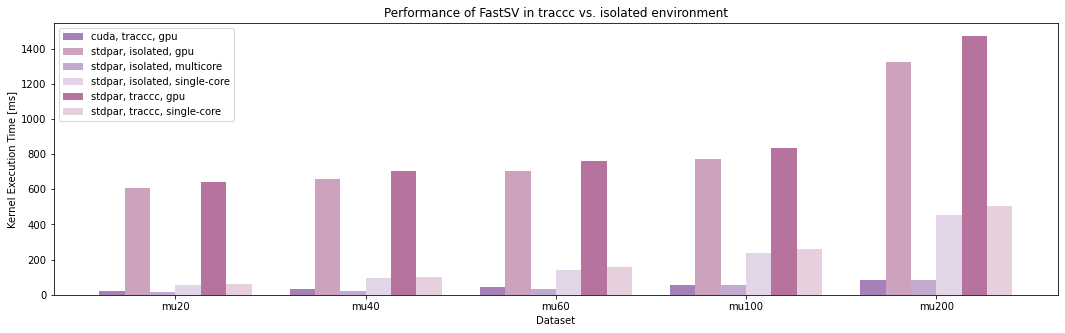

In [15]:
plot_isolated_env_vs_traccc(fast_sv_two, 'FastSV')

In [16]:
# Get all stdpar benchmarks using fast_sv_2 (except the one from other GPU)
masked = df.loc[~geforce_mask & ~ overclock_mask]
sparse_ccl = masked[masked['algorithm'] == 'sparse_ccl']
preview_df(sparse_ccl)

,benchmark,programming_model,target_mode,environment,algorithm,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
36,seq_cca,cpp,single-core,traccc,sparse_ccl,mu20,401913,23.406212,27.594470,ms,30,1
150,stdpar_cca_gpu,stdpar,gpu,traccc,sparse_ccl,mu20,401913,1006.222423,3931.282191,ms,1,1
198,stdpar_cca_nostdpar,stdpar,single-core,traccc,sparse_ccl,mu20,401913,32.379940,239.228441,ms,22,1
294,sparse_ccl_gpu,stdpar,gpu,isolated,sparse_ccl,mu20,401913,368.027471,1794.038522,ms,2,1
300,sparse_ccl_multicore,stdpar,multicore,isolated,sparse_ccl,mu20,401913,7.772453,206.952872,ms,90,1
306,sparse_ccl_nostdpar,stdpar,single-core,isolated,sparse_ccl,mu20,401913,11.731179,319.501257,ms,58,1


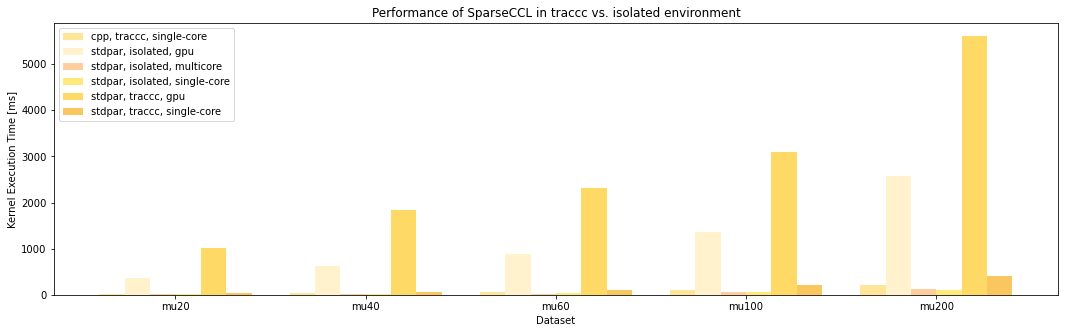

In [17]:
plot_isolated_env_vs_traccc(sparse_ccl, 'SparseCCL')

It can be said, that it is valid to take measurements from isolated env into account for the multicore execution of FastSV and SparseCCL.

## Compare the different FastSV versions on GPU with CUDA and stdpar

In [18]:
sv_algos = df[sv_algo_mask & ~partitioning_mask & ~geforce_mask & traccc_mask & gpu_mask]
preview_df(sv_algos)

,benchmark,programming_model,target_mode,environment,algorithm,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
0,cuda_cca,cuda,gpu,traccc,simplified_sv,mu20,401913,21.277545,1503.323035,ms,33,1
6,cuda_cca,cuda,gpu,traccc,fast_sv_1,mu20,401913,20.924124,1502.955054,ms,33,1
12,cuda_cca,cuda,gpu,traccc,fast_sv_2,mu20,401913,21.023346,1497.580459,ms,33,1
156,stdpar_cca_gpu,stdpar,gpu,traccc,simplified_sv,mu20,401913,563.289216,2683.628410,ms,1,1
162,stdpar_cca_gpu,stdpar,gpu,traccc,fast_sv_1,mu20,401913,595.816041,2722.683677,ms,1,1
168,stdpar_cca_gpu,stdpar,gpu,traccc,fast_sv_2,mu20,401913,639.689366,2758.166585,ms,1,1


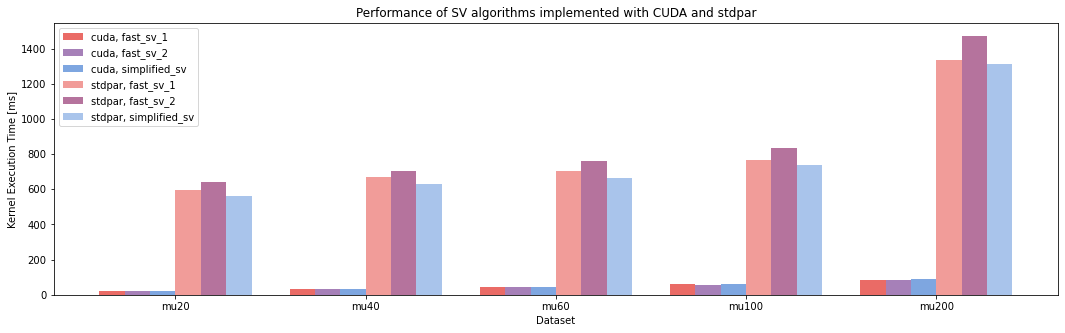

In [19]:
plot_df(df=sv_algos,
        distinct_columns=('programming_model', 'algorithm'),
        label_fields=('programming_model', 'algorithm'), 
        title=f'Performance of SV algorithms implemented with CUDA and stdpar')